# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 11.11.2019

Мягкий дедлайн: 1:59MSK 22.11.2019

Жесткий дедлайн: 23:59MSK 23.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/15454/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

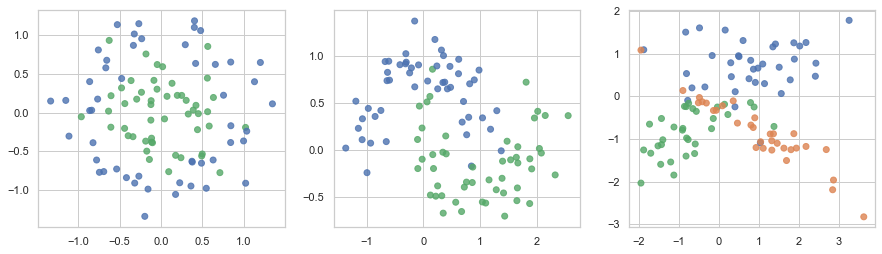

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

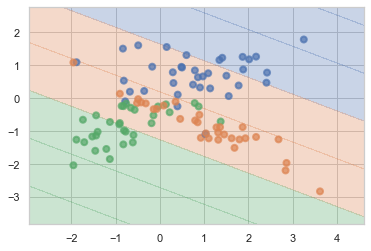

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

score on train dataset 1.0 | score on test dataset 0.7666666666666667


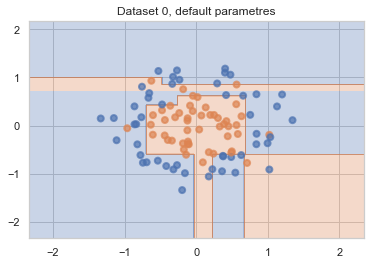

In [27]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf  = DecisionTreeClassifier().fit(X_train, y_train)
plot_surface(clf, X, y)
plt.title("Dataset 0, default parametres")

print("score on train dataset", clf.score(X_train, y_train), 
      "| score on test dataset", clf.score(X_test, y_test))

score on train dataset 1.0 | score on test dataset 0.8666666666666667


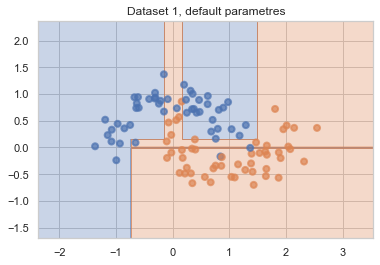

In [28]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf  = DecisionTreeClassifier().fit(X_train, y_train)
plot_surface(clf, X, y)
plt.title("Dataset 1, default parametres")

print("score on train dataset", clf.score(X_train, y_train), 
      "| score on test dataset", clf.score(X_test, y_test))

score on train dataset 1.0 | score on test dataset 0.8


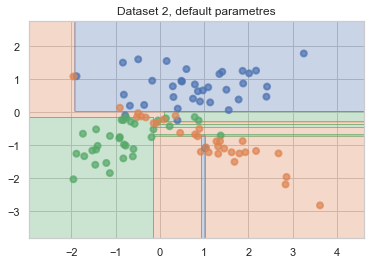

In [29]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf  = DecisionTreeClassifier().fit(X_train, y_train)
plot_surface(clf, X, y)
plt.title("Dataset 2, default parametres")

print("score on train dataset", clf.score(X_train, y_train), 
      "| score on test dataset", clf.score(X_test, y_test))

__Ответ:__ Мне кажется, что деревья переобучились довольно сильно. Об этом можно судить по наличию тонких полос одного цвета среди "заливки" другим на каждом из графиков

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

score on train dataset 0.8285714285714286 | score on test dataset 0.6333333333333333


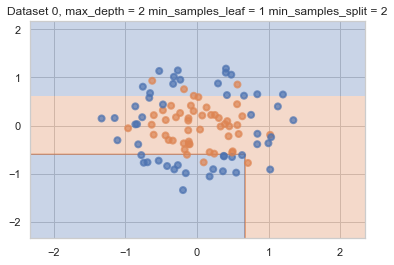

score on train dataset 0.8285714285714286 | score on test dataset 0.6333333333333333


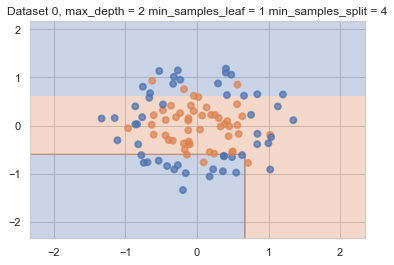

score on train dataset 0.8285714285714286 | score on test dataset 0.6333333333333333


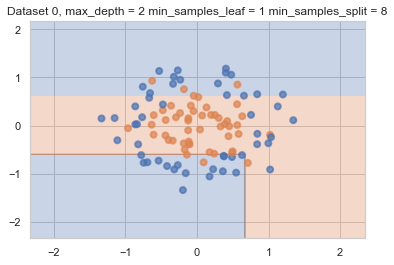

score on train dataset 0.8142857142857143 | score on test dataset 0.6666666666666666


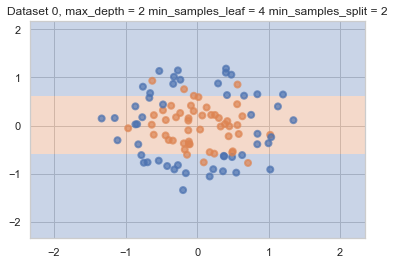

score on train dataset 0.8142857142857143 | score on test dataset 0.6666666666666666


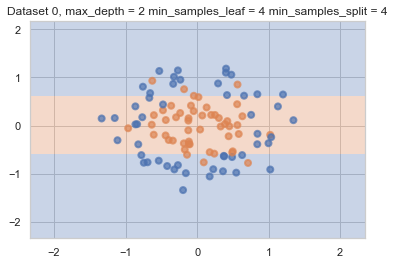

score on train dataset 0.8142857142857143 | score on test dataset 0.6666666666666666


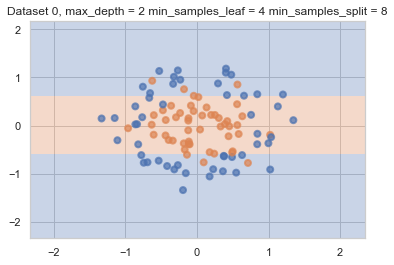

score on train dataset 1.0 | score on test dataset 0.7333333333333333


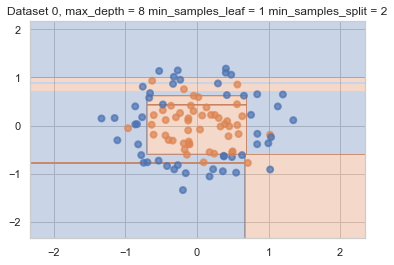

score on train dataset 0.9857142857142858 | score on test dataset 0.7666666666666667


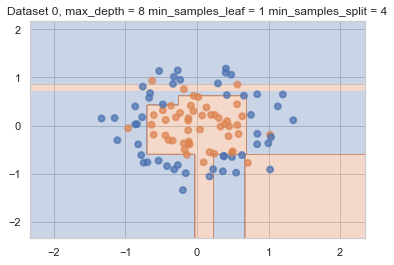

score on train dataset 0.9428571428571428 | score on test dataset 0.7666666666666667


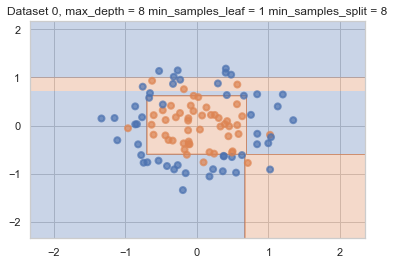

score on train dataset 0.9 | score on test dataset 0.8666666666666667


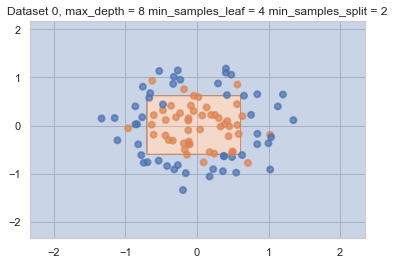

score on train dataset 0.9 | score on test dataset 0.8666666666666667


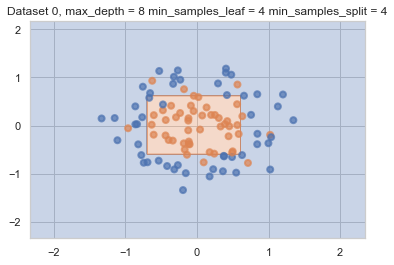

score on train dataset 0.9 | score on test dataset 0.8666666666666667


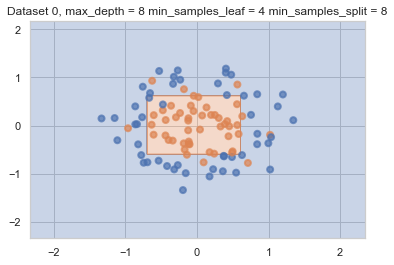

In [108]:
X, y = datasets[0]
max_depth = [2, 8]
min_samples_leaf = [1, 4]
min_samples_split = [2, 4, 8]

plt.figure(figsize=(6, 4))
for i, depth in enumerate(max_depth):
    for j, samples_leaf in enumerate(min_samples_leaf):
        for k, samples_split in enumerate(min_samples_split):
            X, y = datasets[0]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            clf  = DecisionTreeClassifier(max_depth=depth, 
                                          min_samples_leaf=samples_leaf, 
                                          min_samples_split=samples_split).fit(X_train, y_train)
            print("score on train dataset", clf.score(X_train, y_train), 
                  "| score on test dataset", clf.score(X_test, y_test))
            plot_surface(clf, X, y)
            plt.title("Dataset 0, max_depth = "
                      + str(depth) + " min_samples_leaf = "
                      + str(samples_leaf) + " min_samples_split = "
                      + str(samples_split))
            plt.show()

score on train dataset 0.9142857142857143 | score on test dataset 0.9333333333333333


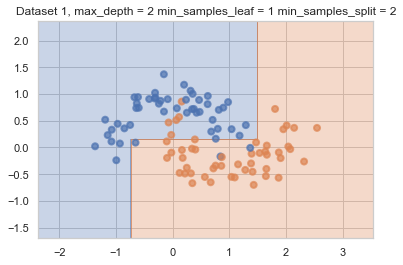

score on train dataset 0.9142857142857143 | score on test dataset 0.9333333333333333


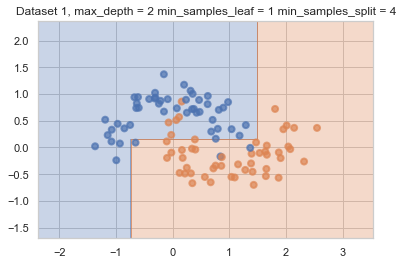

score on train dataset 0.9142857142857143 | score on test dataset 0.9333333333333333


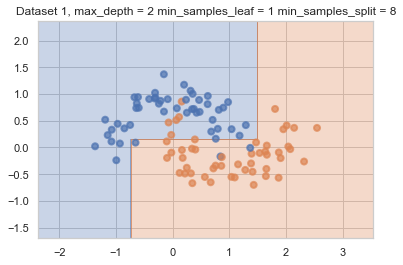

score on train dataset 0.9 | score on test dataset 0.8333333333333334


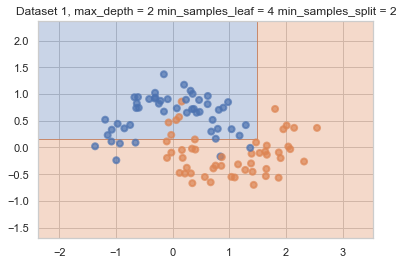

score on train dataset 0.9 | score on test dataset 0.8333333333333334


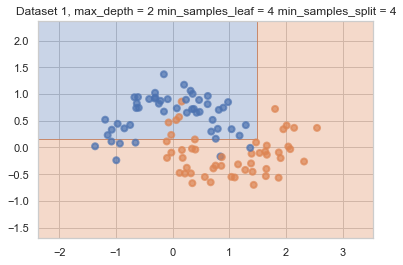

score on train dataset 0.9 | score on test dataset 0.8333333333333334


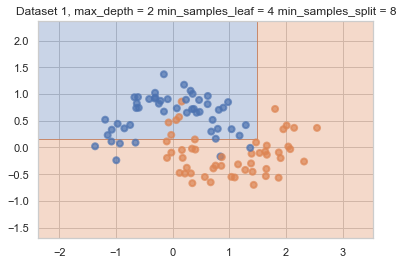

score on train dataset 1.0 | score on test dataset 0.8666666666666667


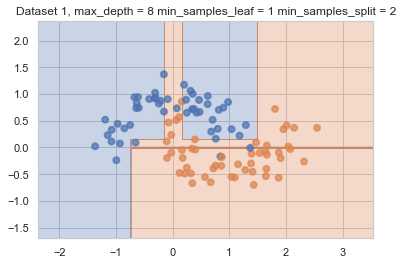

score on train dataset 1.0 | score on test dataset 0.8666666666666667


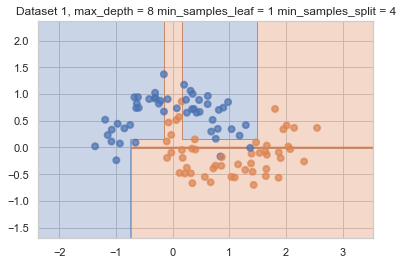

score on train dataset 0.9857142857142858 | score on test dataset 0.8666666666666667


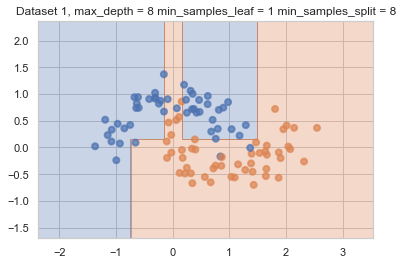

score on train dataset 0.9714285714285714 | score on test dataset 0.7666666666666667


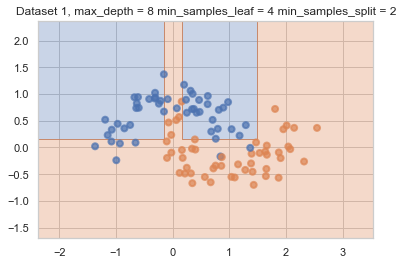

score on train dataset 0.9714285714285714 | score on test dataset 0.7666666666666667


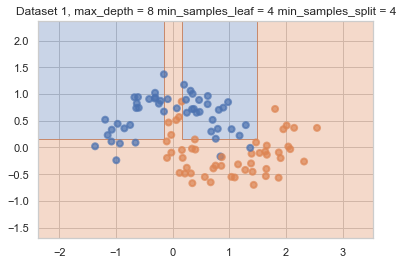

score on train dataset 0.9714285714285714 | score on test dataset 0.7666666666666667


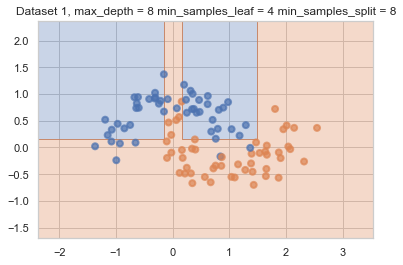

In [95]:
X, y = datasets[1]
max_depth = [2, 8]
min_samples_leaf = [1, 4]
min_samples_split = [2, 4, 8]

plt.figure(figsize=(6, 4))
for i, depth in enumerate(max_depth):
    for j, samples_leaf in enumerate(min_samples_leaf):
        for k, samples_split in enumerate(min_samples_split):
            X, y = datasets[1]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            clf  = DecisionTreeClassifier(max_depth=depth, 
                                          min_samples_leaf=samples_leaf, 
                                          min_samples_split=samples_split).fit(X_train, y_train)
            print("score on train dataset", clf.score(X_train, y_train), 
                  "| score on test dataset", clf.score(X_test, y_test))
            plot_surface(clf, X, y)
            plt.title("Dataset 1, max_depth = "
                      + str(depth) + " min_samples_leaf = "
                      + str(samples_leaf) + " min_samples_split = "
                      + str(samples_split))
            plt.show()

score on train dataset 0.9 | score on test dataset 0.7666666666666667


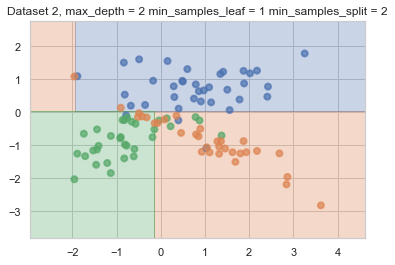

score on train dataset 0.9 | score on test dataset 0.7666666666666667


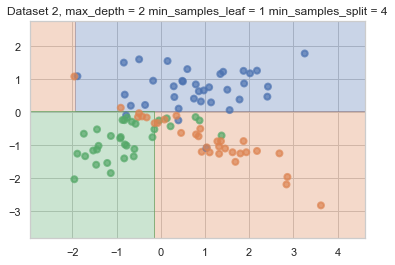

score on train dataset 0.9 | score on test dataset 0.7666666666666667


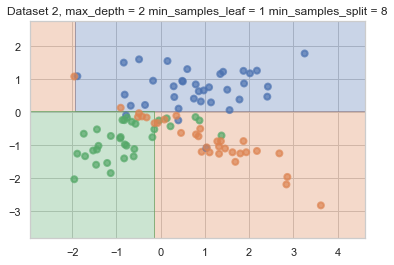

score on train dataset 0.8857142857142857 | score on test dataset 0.7666666666666667


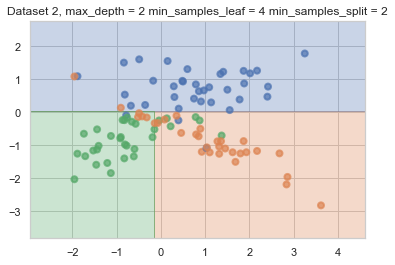

score on train dataset 0.8857142857142857 | score on test dataset 0.7666666666666667


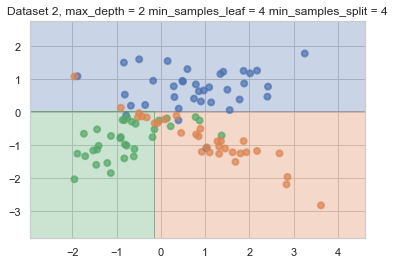

score on train dataset 0.8857142857142857 | score on test dataset 0.7666666666666667


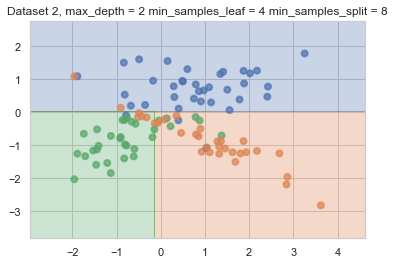

score on train dataset 1.0 | score on test dataset 0.8


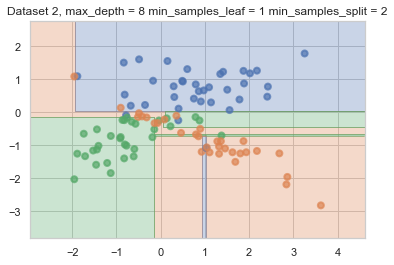

score on train dataset 0.9714285714285714 | score on test dataset 0.8


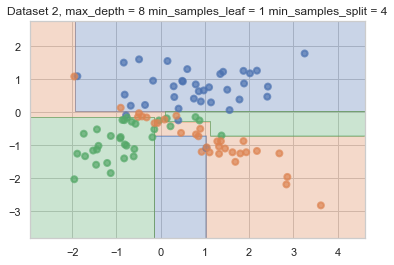

score on train dataset 0.9428571428571428 | score on test dataset 0.8333333333333334


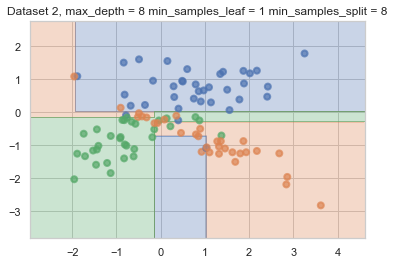

score on train dataset 0.9142857142857143 | score on test dataset 0.7666666666666667


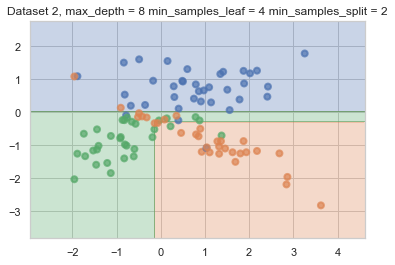

score on train dataset 0.9142857142857143 | score on test dataset 0.7666666666666667


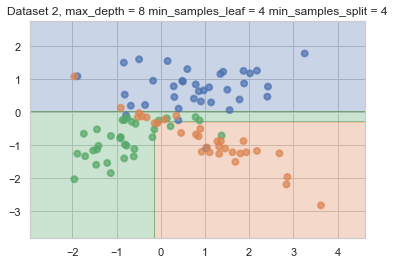

score on train dataset 0.9142857142857143 | score on test dataset 0.7666666666666667


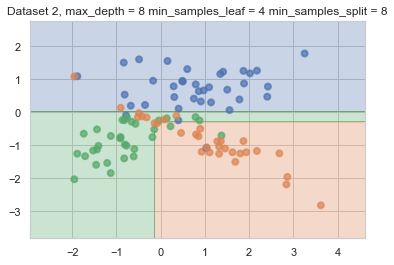

In [96]:
X, y = datasets[2]
max_depth = [2, 8]
min_samples_leaf = [1, 4]
min_samples_split = [2, 4, 8]

plt.figure(figsize=(6, 4))
for i, depth in enumerate(max_depth):
    for j, samples_leaf in enumerate(min_samples_leaf):
        for k, samples_split in enumerate(min_samples_split):
            X, y = datasets[2]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            clf  = DecisionTreeClassifier(max_depth=depth, 
                                          min_samples_leaf=samples_leaf, 
                                          min_samples_split=samples_split).fit(X_train, y_train)
            print("score on train dataset", clf.score(X_train, y_train), 
                  "| score on test dataset", clf.score(X_test, y_test))
            plot_surface(clf, X, y)
            plt.title("Dataset 2, max_depth = "
                      + str(depth) + " min_samples_leaf = "
                      + str(samples_leaf) + " min_samples_split = "
                      + str(samples_split))
            plt.show()

__Ответ:__ Если я правильно понимаю, то с увеличением взятых мною параметров машина наоборот уходит от переобучения. (то есть либо классификация хуже просто, либо реально параметры защищают от переобучения. Понять точно пока не могу. Очевидно что для разных датасетов изменение разное просто потому что им надо предсказать по сути разные классы. То есть как раз кружки, месяцы и рандом условно.. поэтому их подстройка будет разной. Для нулевого датасета мы вывели прямоугольник стремящийся быть кругом. Для первого -- мы выдали разбиение из прямоугольников которое реально похоже на месяц, для третьего довольно нормально (как мне кажется) разбили эту площадь на три прямогульника (при самых больших коэф-ах)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [186]:
def find_best_split(feature_vector, target_vector):
    """
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    feature_vector_sorted = np.sort(feature_vector)
    indices = np.argsort(feature_vector)
    
    vec_left_tree = target_vector.astype(np.bool)[indices][:-1]
    vec_right_tree = np.flip(target_vector.astype(np.bool)[indices][1:])

    thres_vec = (feature_vector_sorted[:-1] + feature_vector_sorted[1:])
    thres_vec /= 2
    
    tar_vec_size = len(target_vector)

    R_left = np.cumsum(vec_left_tree) / np.arange(1, tar_vec_size)
    R_right = np.flip(np.cumsum(vec_right_tree)) / (tar_vec_size - np.arange(1, tar_vec_size))

    Gini_vec = -2 * R_left * (1 - R_left) * np.arange(1, tar_vec_size) / tar_vec_size - 2 * R_right * (1 - R_right) * (tar_vec_size - np.arange(1, tar_vec_size)) / tar_vec_size

    return thres_vec, Gini_vec, thres_vec[np.argmax(Gini_vec)], Gini_vec[np.argmax(Gini_vec)]

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [187]:
students = pd.read_csv("students.csv")

In [188]:
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [189]:
students.iloc[:, 1]

0      0.00
1      0.08
2      0.06
3      0.10
4      0.08
       ... 
253    0.78
254    0.61
255    0.82
256    0.75
257    0.90
Name: SCG, Length: 258, dtype: float64

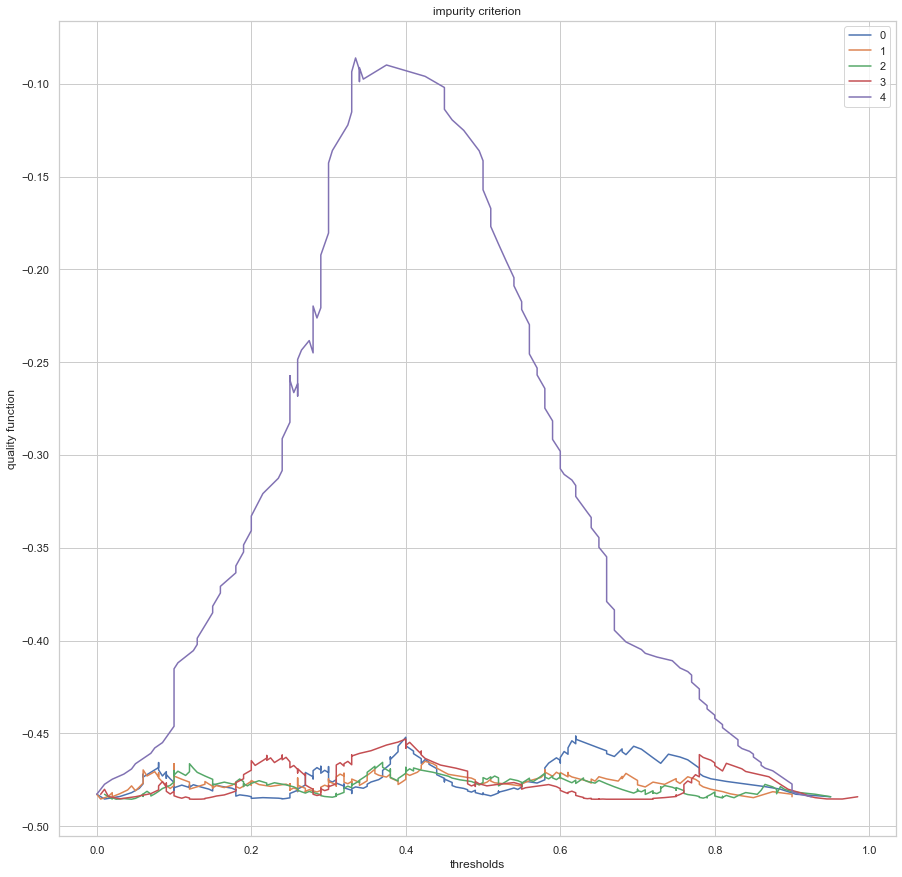

In [190]:
plt.figure(figsize=(15, 15))
for i in range(students.shape[1] - 1):
    plt.plot(find_best_split(students.iloc[:, i].as_matrix(), students.iloc[:, -1].as_matrix())[0], 
             find_best_split(students.iloc[:, i].as_matrix(), students.iloc[:, -1].as_matrix())[1], label = i)
    plt.title('impurity criterion')
    plt.xlabel('thresholds')
    plt.ylabel('quality function')
    plt.legend()

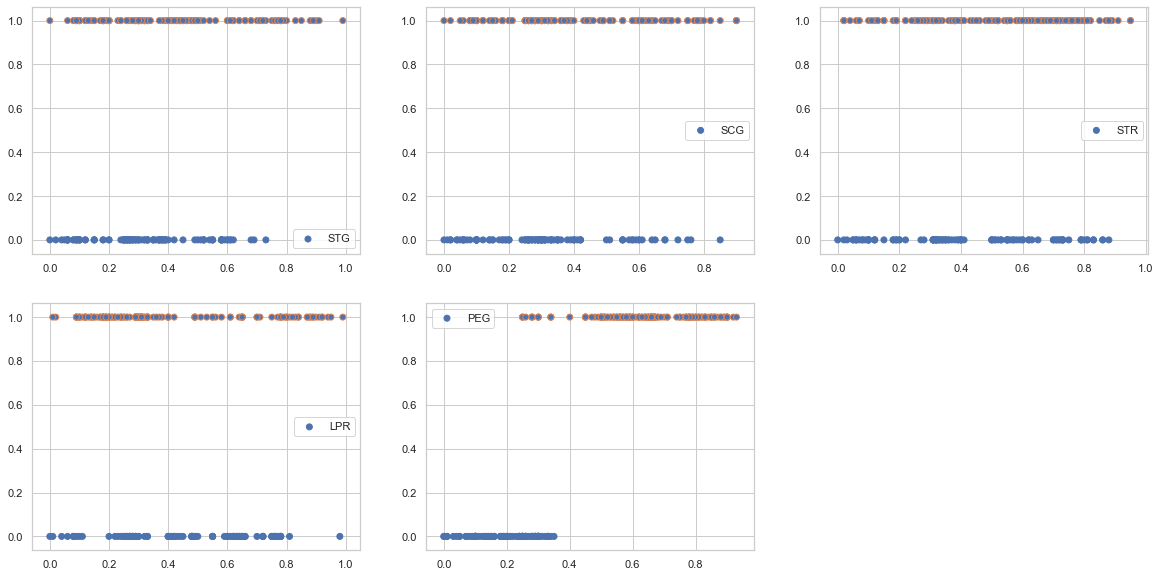

In [208]:
plt.figure(figsize=(20, 10))
for i, feature in enumerate(students.columns[:-1]):
    y = students.iloc[:, -1].as_matrix()
    fea_amnt = len(students.columns[:-1])
    plt.subplot(2, 3, i + 1)
    plt.scatter(students[feature].as_matrix(),
                students.iloc[:, -1].as_matrix(),
                cmap=cmap, edgecolors=np.array(palette)[y], label=feature)
    plt.legend()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Очевидно, что деление выборки на два поддерева лучше всего будет производить по последнему( пятому) признаку (PEG) так как он наиболее показателен на графике кривых (остальные ведут себя пряимо скажем неадекватно). Это согласовывается и с scatter-plot максимально сильно у PEG проявляется разделение прямой на две части входных данных. (на графике в районе 0.3)

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**